## Graph Session training a single layer perceptron on MNIST

In [1]:
import tensorflow as tf

# Import MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot= True)

W0829 19:39:39.351881 4557211072 deprecation.py:323] From <ipython-input-1-fdcf07f58ab1>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0829 19:39:39.353401 4557211072 deprecation.py:323] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0829 19:39:39.357169 4557211072 deprecation.py:323] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.lear

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0829 19:40:01.743119 4557211072 deprecation.py:323] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0829 19:40:01.747658 4557211072 deprecation.py:323] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0829 19:40:07.348356 4557211072 deprecation.py:323] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Shape of dataset
print(mnist.train.images.shape)
print(mnist.test.num_examples)

(55000, 784)
10000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Shape of one image
mnist.train.images[1].shape

(784,)

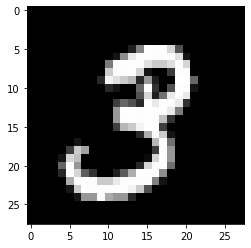

In [4]:
# Display the image reshaping it in 28x28
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='gray')

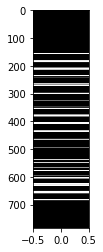

In [5]:
# We shall be feeding the following structure of data to NN
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.005)

In [6]:
#we will be feeding the whole dataset in batches
x= tf.placeholder(tf.float32,shape=[None,784])

#weights for 10 labels
W = tf.Variable(tf.zeros([784,10]))

# biases for each classes
b= tf.Variable(tf.zeros([10]))

# Single training layer perceptron 
y= tf.matmul(x,W)+b

# Labels for 
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [8]:
#Loss function (finding error)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= y_true,logits= y))

#Optimization (minimize error)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [9]:
# Training means minimizing the cross entropy loss 
train = optimizer.minimize(cross_entropy)

In [10]:
# Global initialisation of variables
init = tf.global_variables_initializer()

In [11]:
# Finally training the under the session and displaying the accuracy
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100) # built-in batch feeder from mnist
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    acc= tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9145


Next, we shall try higher levels of tensorflow API